In [428]:
import pandas
import numpy
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
import random
import squarify 

In [429]:
# reading data
path1 = '/Users/bogireddyteja/Documents/Taxi_Trips_Dec2019-Present.csv'
data1 = pandas.read_csv(path1)

In [431]:
# reading data
path2 = '/Users/bogireddyteja/Documents/Taxi_Trips_Dec2018-June2019.csv'
data2 = pandas.read_csv(path2)

In [432]:
data1.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,e4c06ccfb0d1de5db8675fb3a2779b209760d6ac,bbf91e67201de7487dbeb23021a9a741e36d8d65175def...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,600.0,0.1,1.703184e+10,1.703108e+10,32.0,8.0,...,0.0,10.50,Credit Card,Taxi Affiliation Services,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)
1,e1de111c0c25003054c31e0e49e9f64cc00a8683,b83ba3da1a4bc2a686d885ec2f802c3f256c518d93816c...,12/01/2019 12:15:00 AM,12/01/2019 12:15:00 AM,180.0,0.0,NaN,NaN,7.0,6.0,...,0.0,7.00,Credit Card,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
2,e0ed81be1b41bda25285afeeb76d4e4fb4be30fc,53c01ec83313fee495650d2294b7c88ade2f3d82f3acd0...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,380.0,1.2,NaN,NaN,14.0,16.0,...,1.0,7.25,Cash,Flash Cab,41.968069,-87.721559,POINT (-87.7215590627 41.968069),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253)
3,e077d949ef075542a5168b48f9d09bd9320fd2d6,ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,780.0,2.0,1.703184e+10,1.703108e+10,32.0,8.0,...,2.0,13.60,Credit Card,Taxi Affiliation Services,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)
4,dfeeafe19f4fe8d71f5eadb6919b0f2fca99ee62,71cf25528ebc98e11ac91a5d359776a91874e7f6047cb8...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,720.0,3.1,1.703128e+10,1.703107e+10,28.0,7.0,...,1.0,12.50,Cash,Taxi Affiliation Services,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.922083,-87.634156,POINT (-87.6341560931 41.922082541)


In [433]:
data2.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,5b63145a6327dd526111b9f718d39ea1266985b3,33eb8518952dbdc8a4c6648ad8fdf65dc84fac160f3d6f...,12/01/2018 12:15:00 AM,12/01/2018 12:30:00 AM,271.0,1.1,1.703108e+10,1.703108e+10,8.0,8.0,...,1.5,7.5,Cash,Yellow Cab,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.907492,-87.635760,POINT (-87.6357600901 41.9074919303)
1,ff53acf636462965b763cb9ca264fe1ff810a6ba,7ff1fd92d52bfeec34b599a2cf4c4491af29916df6fc3c...,12/01/2018 12:15:00 AM,12/01/2018 12:15:00 AM,347.0,1.3,1.703108e+10,1.703108e+10,8.0,8.0,...,1.0,7.5,Cash,Yellow Cab,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.907492,-87.635760,POINT (-87.6357600901 41.9074919303)
2,16060fe02d37f14a1abc54b06bbf9f2a3baac75a,1affa7361d87ad31e0be8b016dd8e86d3c43e4e1d9ced9...,12/01/2018 12:15:00 AM,12/01/2018 12:30:00 AM,1680.0,12.8,NaN,NaN,3.0,NaN,...,0.0,33.5,Cash,Yellow Cab,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),NaN,NaN,NaN
3,889c158b49e0397a3772d92408db1ad875865a6b,4d93ebac88329db326a9665ddc3864bbcc9b06f616e4ff...,12/01/2018 12:15:00 AM,12/01/2018 12:15:00 AM,272.0,0.4,1.703108e+10,1.703108e+10,8.0,8.0,...,2.5,9.5,Credit Card,Flash Cab,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
4,c96da05e46984d32b33cc94c77b5f77f5c6f8f2b,09b0865d5ad0def4383fb26a206bacb9f84342269d4f30...,12/01/2018 12:15:00 AM,12/01/2018 12:15:00 AM,205.0,1.1,1.703132e+10,1.703128e+10,32.0,28.0,...,1.0,7.0,Cash,Flash Cab,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.885300,-87.642808,POINT (-87.6428084655 41.8853000224)


In [434]:
data1.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [435]:
data2.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [436]:
# convert to timestamp
data1['Trip Start Timestamp'] = pandas.to_datetime(data1['Trip Start Timestamp'])
data1['Trip End Timestamp'] = pandas.to_datetime(data1['Trip End Timestamp'])

In [437]:
# convert to timestamp
data2['Trip Start Timestamp'] = pandas.to_datetime(data2['Trip Start Timestamp'])
data2['Trip End Timestamp'] = pandas.to_datetime(data2['Trip End Timestamp'])

In [438]:
# split timestamp to time and date
data1['Start Date'] = data1['Trip Start Timestamp'].dt.date
data1['Start Time'] = data1['Trip Start Timestamp'].dt.time

In [439]:
# split timestamp to time and date
data2['Start Date'] = data2['Trip Start Timestamp'].dt.date
data2['Start Time'] = data2['Trip Start Timestamp'].dt.time

In [440]:
# split timestamp to time and date
data1['End Date'] = data1['Trip End Timestamp'].dt.date
data1['End Time'] = data1['Trip End Timestamp'].dt.time

In [441]:
# split timestamp to time and date
data2['End Date'] = data2['Trip End Timestamp'].dt.date
data2['End Time'] = data2['Trip End Timestamp'].dt.time

In [442]:
# delete timestamp
del data1['Trip Start Timestamp']
del data1['Trip End Timestamp']

In [443]:
# delete timestamp
del data2['Trip Start Timestamp']
del data2['Trip End Timestamp']

In [444]:
data1.head()

,Trip ID,Taxi ID,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,...,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Start Date,Start Time,End Date,End Time
0,e4c06ccfb0d1de5db8675fb3a2779b209760d6ac,bbf91e67201de7487dbeb23021a9a741e36d8d65175def...,600.0,0.1,1.703184e+10,1.703108e+10,32.0,8.0,8.75,1.75,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),2019-12-01,00:15:00,2019-12-01,00:30:00
1,e1de111c0c25003054c31e0e49e9f64cc00a8683,b83ba3da1a4bc2a686d885ec2f802c3f256c518d93816c...,180.0,0.0,NaN,NaN,7.0,6.0,5.00,2.00,...,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),2019-12-01,00:15:00,2019-12-01,00:15:00
2,e0ed81be1b41bda25285afeeb76d4e4fb4be30fc,53c01ec83313fee495650d2294b7c88ade2f3d82f3acd0...,380.0,1.2,NaN,NaN,14.0,16.0,6.25,0.00,...,41.968069,-87.721559,POINT (-87.7215590627 41.968069),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),2019-12-01,00:15:00,2019-12-01,00:30:00
3,e077d949ef075542a5168b48f9d09bd9320fd2d6,ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...,780.0,2.0,1.703184e+10,1.703108e+10,32.0,8.0,9.25,2.35,...,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),2019-12-01,00:15:00,2019-12-01,00:30:00
4,dfeeafe19f4fe8d71f5eadb6919b0f2fca99ee62,71cf25528ebc98e11ac91a5d359776a91874e7f6047cb8...,720.0,3.1,1.703128e+10,1.703107e+10,28.0,7.0,11.50,0.00,...,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.922083,-87.634156,POINT (-87.6341560931 41.922082541),2019-12-01,00:15:00,2019-12-01,00:30:00


In [445]:

data2.head()

,Trip ID,Taxi ID,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,...,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Start Date,Start Time,End Date,End Time
0,5b63145a6327dd526111b9f718d39ea1266985b3,33eb8518952dbdc8a4c6648ad8fdf65dc84fac160f3d6f...,271.0,1.1,1.703108e+10,1.703108e+10,8.0,8.0,6.0,0.0,...,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),2018-12-01,00:15:00,2018-12-01,00:30:00
1,ff53acf636462965b763cb9ca264fe1ff810a6ba,7ff1fd92d52bfeec34b599a2cf4c4491af29916df6fc3c...,347.0,1.3,1.703108e+10,1.703108e+10,8.0,8.0,6.5,0.0,...,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),2018-12-01,00:15:00,2018-12-01,00:15:00
2,16060fe02d37f14a1abc54b06bbf9f2a3baac75a,1affa7361d87ad31e0be8b016dd8e86d3c43e4e1d9ced9...,1680.0,12.8,NaN,NaN,3.0,NaN,33.5,0.0,...,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),NaN,NaN,NaN,2018-12-01,00:15:00,2018-12-01,00:30:00
3,889c158b49e0397a3772d92408db1ad875865a6b,4d93ebac88329db326a9665ddc3864bbcc9b06f616e4ff...,272.0,0.4,1.703108e+10,1.703108e+10,8.0,8.0,5.0,2.0,...,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2018-12-01,00:15:00,2018-12-01,00:15:00
4,c96da05e46984d32b33cc94c77b5f77f5c6f8f2b,09b0865d5ad0def4383fb26a206bacb9f84342269d4f30...,205.0,1.1,1.703132e+10,1.703128e+10,32.0,28.0,6.0,0.0,...,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),2018-12-01,00:15:00,2018-12-01,00:15:00


In [446]:
data1['Start Month'] = pandas.to_datetime(data1['Start Date']).dt.to_period('M')
data1['End Month'] = pandas.to_datetime(data1['End Date']).dt.to_period('M')

In [447]:
data2['Start Month'] = pandas.to_datetime(data2['Start Date']).dt.to_period('M')
data2['End Month'] = pandas.to_datetime(data2['End Date']).dt.to_period('M')

In [448]:
# delete null taxi_id
taxi_id_null_index1 = numpy.argwhere(data1['Taxi ID'].isnull().to_numpy())
data1 = data1.drop(taxi_id_null_index1[:, 0])

In [449]:
# delete null taxi_id
taxi_id_null_index2 = numpy.argwhere(data2['Taxi ID'].isnull().to_numpy())
data2 = data2.drop(taxi_id_null_index2[:, 0])

In [450]:
print('unique taxi ids in data1', len(set(data1['Taxi ID'].to_numpy()))) # unique ids
print('unique taxi ids in data2',len(set(data2['Taxi ID'].to_numpy()))) # unique ids
print('intersection of taxi ids',len(set(data1['Taxi ID'].to_numpy()).intersection(set(data2['Taxi ID'].to_numpy())))) # intersection between data

unique taxi ids in data1 4609
unique taxi ids in data2 5488
intersection of taxi ids 4288


In [451]:
# delete all irrelavant columns
del data1['Pickup Census Tract']
del data1['Dropoff Census Tract']
del data1['Pickup Centroid Location']
del data1['Dropoff Centroid  Location']
del data2['Pickup Census Tract']
del data2['Dropoff Census Tract']
del data2['Pickup Centroid Location']
del data2['Dropoff Centroid  Location']

# Based on Earnings

In [452]:
# group by taxi_id and find mean trip total
grp_data1_by_id = data1.groupby('Taxi ID', as_index=False)['Taxi ID', 'Trip Total'].sum()
grp_data2_by_id = data2.groupby('Taxi ID', as_index=False)['Taxi ID', 'Trip Total'].sum()

In [453]:
# common taxis between two data files
intersection_taxi_id = set(data1['Taxi ID'].to_numpy()).intersection(set(data2['Taxi ID'].to_numpy()))

In [454]:
# find total earnings for taxis in both years
fare_df = pandas.DataFrame(columns=['Taxi ID', 'Taxi Name', 'Present Earnings', 'Previous Earnings'])

for i, taxi in tqdm(enumerate(intersection_taxi_id)):
    idx1 = grp_data1_by_id.index[grp_data1_by_id['Taxi ID'] == taxi].tolist()
    idx2 = grp_data2_by_id.index[grp_data2_by_id['Taxi ID'] == taxi].tolist()
    amount_earned1 = grp_data1_by_id['Trip Total'][idx1]
    amount_earned2 = grp_data2_by_id['Trip Total'][idx2]
    fare_df.loc[i] = [taxi] + ['Taxi' + str(i+1)] +[float(amount_earned1)] + [float(amount_earned2)]

4288it [00:38, 111.82it/s]


In [455]:
fare_df.head(100)

,Taxi ID,Taxi Name,Present Earnings,Previous Earnings
0,9d12ca45449fe71f81bb8811299c5125500a6f80cc924b...,Taxi1,36.80,369.40
1,3a7abc9f1cdbcb82d1ea42811f112bdba8686471ce9961...,Taxi2,24614.03,48892.52
2,62d8066f9c6d8b2909413e6f4729fad33c05b86a67d931...,Taxi3,13330.63,45957.88
3,9c10fd03c3480ece8bbb2493c43efa87b352df45cda5fd...,Taxi4,13174.00,31072.11
4,ed7ee99892d4a5597a6e3c13256c5175159c31a594f336...,Taxi5,16216.13,31019.18
...,...,...,...,...
95,6575b6cf54ed0c60594e50d7b13101294496e43289a140...,Taxi96,19695.64,16161.34
96,8423aff4ae55153cc18d090c35b73b5cb6376b828d836d...,Taxi97,14737.78,20157.42
97,019ae1913a19db4e7f5d4fd12f8337d3ad6919b9260b51...,Taxi98,16833.60,37712.29
98,1a5d97e9cf41283b49c979600b62232f634be0c2a68102...,Taxi99,16540.30,34439.41


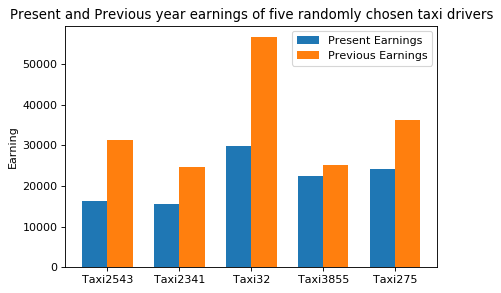

In [456]:
# pick 5 random taxis and visualize total earnings
random_5_taxi_pick = random.sample(range(1, 4288), 5)
labels = []
present_earnings = []
previous_earnings = []

for index in random_10_taxi_pick:
    labels.append(fare_df['Taxi Name'][index])
    present_earnings.append(fare_df['Present Earnings'][index])
    previous_earnings.append(fare_df['Previous Earnings'][index])
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, present_earnings, width, label='Present Earnings')
rects2 = ax.bar(x + width/2, previous_earnings, width, label='Previous Earnings')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Earning')
ax.set_title('Present and Previous year earnings of five randomly chosen taxi drivers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

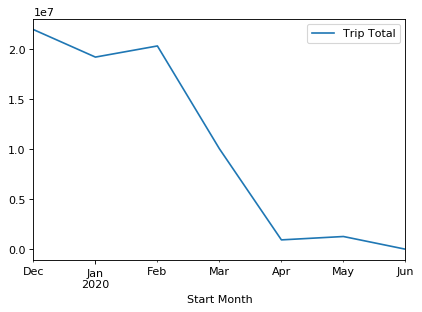

In [478]:
data1.groupby('Start Month', as_index=False)['Start Month','Trip Total'].sum().plot()

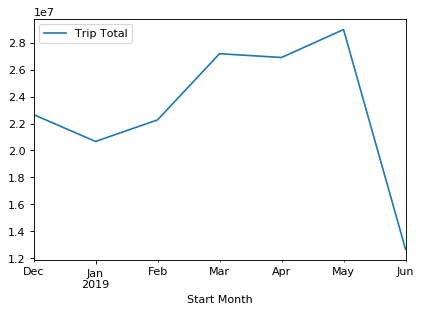

In [481]:
# earnings grouped by month before pandemic
data2.groupby('Start Month')['Start Month', 'Trip Total'].sum().plot()

# Based on Payment Type

In [459]:
# find all kinds of payment methods
set(numpy.asarray(data1['Payment Type']))

{'Cash',
 'Credit Card',
 'Dispute',
 'Mobile',
 'No Charge',
 'Prcard',
 'Prepaid',
 'Unknown'}

In [460]:
# count number of times a payment is used after pandemic
grp_data1_by_pay_method = data1.groupby('Payment Type', as_index=False).agg({"Trip ID" : "count"})
grp_data1_by_pay_method.columns = ['Payment Type', 'Count']

In [461]:
# count number of times a payment is used before pandemic
grp_data2_by_pa y_method = data2.groupby('Payment Type', as_index=False).agg({"Trip ID" : "count"})
grp_data2_by_pay_method.columns = ['Payment Type', 'Count']

In [462]:
# average
payment_name1 = np.asarray(grp_data1_by_pay_method['Payment Type'])
total = float(grp_data1_by_pay_method['Count'].sum())
grp_data1_by_pay_method['Count'] = grp_data1_by_pay_method['Count']/total
grp_data1_by_pay_method   

,Payment Type,Count
0,Cash,0.489951
1,Credit Card,0.452519
2,Dispute,0.000530
3,Mobile,0.018702
4,No Charge,0.001410
5,Prcard,0.021249
6,Prepaid,0.000049
7,Unknown,0.015588


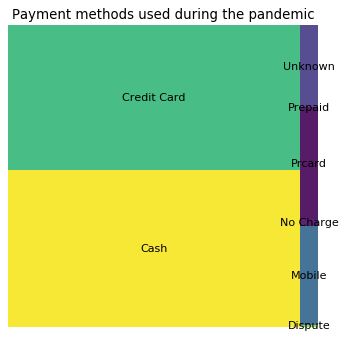

In [485]:
# plot
plt.figure(figsize=(5, 5), dpi= 80)
squarify.plot(sizes=grp_data1_by_pay_method['Count'], label=grp_data1_by_pay_method['Payment Type'], alpha=.9)

# Decorate
plt.title('Payment methods used during the pandemic')
plt.axis('off')
plt.show()

In [464]:
# average
payment_name2 = np.asarray(grp_data2_by_pay_method['Payment Type'])
total = float(grp_data2_by_pay_method['Count'].sum())
grp_data2_by_pay_method['Count'] = grp_data2_by_pay_method['Count']/total
grp_data2_by_pay_method   

,Payment Type,Count
0,Cash,0.498918
1,Credit Card,0.475485
2,Dispute,0.000373
3,Mobile,0.011648
4,No Charge,0.001975
5,Pcard,0.000083
6,Prcard,0.006341
7,Prepaid,0.000038
8,Unknown,0.005140


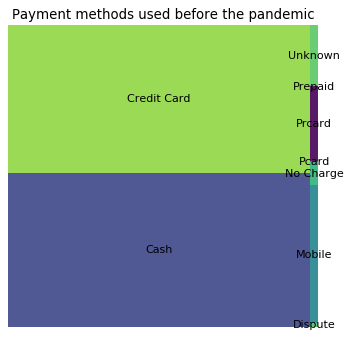

In [483]:
# plot
plt.figure(figsize=(5, 5), dpi= 80)
squarify.plot(sizes=grp_data2_by_pay_method['Count'], label=grp_data2_by_pay_method['Payment Type'], alpha=.9)

# Decorate
plt.title('Payment methods used before the pandemic')
plt.axis('off')
plt.show()

In [ ]:
data1.to_csv('transformed_data1.csv')

In [480]:
data2.to_csv('transformed_data2.csv')